### Introduction

The algorithm, given a directed graph and a starting vertex, it will find the shortest paths between the starting vertex and all vertices it can reach. The algorithm **only** works when the paths have non negative edges connecting the vertices.


Thus, given a graph G = (V, E), a starting vertex s $\in$ V and non negative edges of length $l_e$ where e $\in$ E, the output of the algorithm is dist(s, v) for every vertex v $\in$ V

The dist(s, v) denotes the shortest distance from s to v and dist(s, v) = $\infty$ if there is no path from s to a vertex v.

---

We have seen how BFS can be used to find the shortest path to any vertex from a vertex. This is a special case of graph where each edge has unit length. Djikstra's algorithm is more generic in a way where each edge can have a weight of non positive value.

But can we reduce this graph to a graph where edges are of unit length? That is, if an edge between two vertices have a weight 5, we can replace this edge (with the two vertices) with 5 vertices connected one after other with each edge length of 1 as seen in the following graph



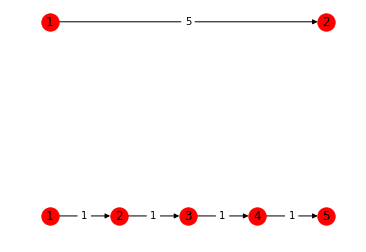

In [2]:
%matplotlib inline
import networkx as nx

g1 = nx.DiGraph()
g1.add_node(1, pos = (0, 5))
g1.add_node(2, pos = (20, 5))
g1.add_edge(1, 2, weight = 5)
pos = nx.get_node_attributes(g1, 'pos')
weights =nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos, edge_labels = weights)
nx.draw(g1, pos, with_labels = True)

g2 = nx.DiGraph()
g2.add_node(1, pos = (0, 0))
g2.add_node(2, pos = (5, 0))
g2.add_node(3, pos = (10, 0))
g2.add_node(4, pos = (15, 0))
g2.add_node(5, pos = (20, 0))
g2.add_edge(1, 2, weight = 1)
g2.add_edge(2, 3, weight = 1)
g2.add_edge(3, 4, weight = 1)
g2.add_edge(4, 5, weight = 1)
pos = nx.get_node_attributes(g2, 'pos')
weights =nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels = weights)
nx.draw(g2, pos, with_labels = True)



The idea sounds right and also works well for small graphs with small length edges. But imagine graphs with vertices of length order or magnitude larger than the number of vertices in a graph (e.g. two vertices connected by edge of length 100 gets transformed to a graoh with 100 vertices each of unit length). 

Though BFS runs in linear time of the input graph size, the transformed graph is way larger that the original graph and hence the time complexity is no longer linear with respect to the original input graph and thus this appoach, though clever doesn't practically scale to all graphs.


---


Let us now look at an implementation of Djikstra's algorithm. Though the implementation here can use heap, we will not use it and stick to the approach the Pseudo code gives in thic chapter. This implementation will use Heap in future notebook and we will be able to appreciate the how the choice of right datastructure is crucial even for the same algorithm

TODO: Naive implementation here

In [3]:
def djikstra_naive(adj_list, start_vert):    
    distances = {v : float('inf') for v in adj_list}
    distances[start_vert] = 0

    X = set()
    X.add(start_vert)

    
    def pick_edge():
        #Naive implementation which does the following
        #
        # 1. For vertices in X, find all edges originating from them to all vertices not in X
        # 2. Keep track of minimum value of len(w) + lwv
        # 3. Return w, v and lwv
        
        from_vert, to_vert, min_edge_len, min_len = None, None, None, float('inf')
        
        for v in X:            
            for tv, edge_len in adj_list[v]:
                edge_len = int(edge_len)
                if tv in X:
                    continue
                    
                djikstra_score = distances[v] + edge_len
                if min_len > djikstra_score:
                    from_vert, to_vert, min_edge_len, min_len = v, tv, edge_len, djikstra_score
        
        return from_vert, to_vert, min_edge_len
        
    from_vert, to_vert, edge_len  = pick_edge()
    while to_vert is not None:
        distances[to_vert] = distances[from_vert] + edge_len
        X.add(to_vert)
        from_vert, to_vert, edge_len  = pick_edge()
        
    return distances

Printing minimum distances from starting vertex s 

Vertex v is at distance 1
Vertex w is at distance 3
Vertex t is at distance 6


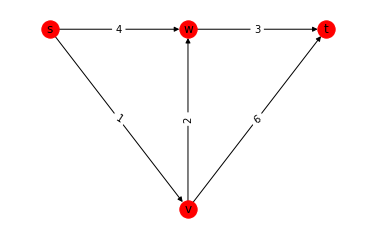

In [4]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
min_dist = djikstra_naive({v : [(t, weights[(v, t)]) for t in k] for v, k in g.adjacency()}, start_vert)
print('Printing minimum distances from starting vertex', start_vert, '\n')
for v in min_dist:
    if v == start_vert:
        continue
    
    print('Vertex', v, 'is at distance', min_dist[v])
    


The naive implementation does work for the simple graph, let us see how it works on the test graph and challenge data set.

In [5]:
!head  problem9.8test.txt

1	2,1	8,2
2	1,1	3,1
3	2,1	4,1
4	3,1	5,1
5	4,1	6,1
6	5,1	7,1
7	6,1	8,1
8	7,1	1,2


In [6]:
def parseFileToAdjList(fname):
    # Constructs an undirected graph from the file representation of the 
    with open(fname, 'r') as f:
        lines = f.readlines()
        
    def rawToAdjList(l):
        splits = l.strip().split('\t')
        source, *dest = splits
        return (source, list(map(lambda d: d.split(','), dest)))
    
    lines = dict(map(rawToAdjList, lines))
    
    return lines
    
adj_list = parseFileToAdjList('problem9.8test.txt')
source = '1'
res = djikstra_naive(adj_list, source)
for s in res:
    print('Vertex', s, 'is at a distance', res[s], 'from source', source)

Vertex 1 is at a distance 0 from source 1
Vertex 2 is at a distance 1 from source 1
Vertex 3 is at a distance 2 from source 1
Vertex 4 is at a distance 3 from source 1
Vertex 5 is at a distance 4 from source 1
Vertex 6 is at a distance 4 from source 1
Vertex 7 is at a distance 3 from source 1
Vertex 8 is at a distance 2 from source 1


Again, the distance seem to be correct based on the results expected [here](http://theory.stanford.edu/~tim/algorithmsilluminated.html). Lets time the big test case and see how long it takes to find the distance from the source to other vertices

In [7]:
%%time
adj_list = parseFileToAdjList('problem9.8.txt')

CPU times: user 4.89 ms, sys: 2.37 ms, total: 7.26 ms
Wall time: 46 ms


In [8]:
%%time
source = '1'
res = djikstra_naive(adj_list, source)

CPU times: user 189 ms, sys: 4.49 ms, total: 193 ms
Wall time: 194 ms


In [9]:
vertex_subset = [7,37,59,82,99,115,133,165,188,197]
for s in vertex_subset:
    print('Vertex', s, 'is at a distance', res[str(s)], 'from source', source)

Vertex 7 is at a distance 2599 from source 1
Vertex 37 is at a distance 2610 from source 1
Vertex 59 is at a distance 2947 from source 1
Vertex 82 is at a distance 2052 from source 1
Vertex 99 is at a distance 2367 from source 1
Vertex 115 is at a distance 2399 from source 1
Vertex 133 is at a distance 2029 from source 1
Vertex 165 is at a distance 2442 from source 1
Vertex 188 is at a distance 2505 from source 1
Vertex 197 is at a distance 3068 from source 1



The naive method works well even for a graph with 200 vertices. As the number of vertices grows this approach will be impractical and using a heap data structure for picking the next vertex with the best Djikstra's score will be required.

---

We will not look at why the algorithm is correct.

TODO: Provide proof for the algorithm correctness

---

#### Test your understanding

**Problem 9.1** 

(a) and (b)

(a) is possible when we have all vertices connected sequentially with no loop in graph. In general, the shortest path passes through all other vertices. (b) is correct as once a vertex is added to frontier, its not possible to add it back in the path.

** Problem 9.2 **

(b). Since the vertices are powers of two and unique, no two edges can add up to the length of any other edge. Thus the shortest path is unique and not other path is guaranteed to have that length.

** Problem 9.3 **

(c) and (d)

(c) is true because adding 10 to an edge adds 10 times the number of edges to the total length. If we had alernate paths with less number of edges which initially were not shortest, adding 10 to all edges might make that path shortest.  (d) is correct as there wont be less than 1 edge between two vertices and thus the different between the shortest and second shortest in the worst case will stay the same despite adding 10 to all edges.

** Problem 9.4 **

I believe (a) is the answer. I cannot come up with a graph that fails. This works only because the source vertex has negatve edges and no other vertex has negative vertex. 

** Problem 9.5 and 9.6 **

The answer is (c), Consider the folowing graph

** Problem 9.7 **

Can't follow the question despite reading the answer

** Problem 9.8 **

Solved earlier.


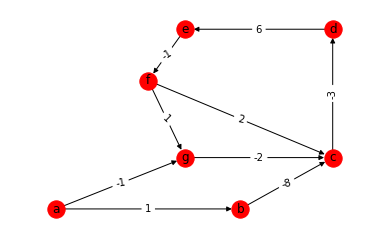

In [35]:
import networkx as nx
g = nx.DiGraph()
g.add_node('a', pos = (0, 5))
g.add_node('b', pos = (10, 5))
g.add_edge('a', 'b', weight = 1)

g.add_node('c', pos = (15, 7))
g.add_edge('b', 'c', weight = -8)

g.add_node('d', pos = (15, 12))
g.add_edge('c', 'd', weight = -3)

g.add_node('e', pos = (7, 12))
g.add_edge('d', 'e', weight = 6)

g.add_node('f', pos = (5, 10))
g.add_edge('e', 'f', weight = -1)
g.add_edge('f', 'c', weight = 2)

g.add_node('g', pos = (7, 7))
g.add_edge('f', 'g', weight = 1)
g.add_edge('g', 'c', weight = -2)
g.add_edge('a', 'g', weight = -1)

pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)


As we see in the above graph, we have two directed cycles g -> c -> d -> e -> f -> g and c -> d -> e -> f -> c. Both have non negative sum of lengths. Still, the shortest distance using Djikstra algorithm for c will be calculated as -3 where the true shortest distance is -7. All vertices that gets pulled into frontier after c will be incorrect. For the above graph, except g and b, the distances will be incorrect. Following code snippet demonstrates the incorrect path lengths

In [37]:
min_dist = djikstra_naive({v : [(t, weights[(v, t)]) for t in k] for v, k in g.adjacency()}, 'a')
min_dist

{'a': 0, 'b': 1, 'c': -3, 'd': -6, 'e': 0, 'f': -1, 'g': -1}